In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
res = pd.read_csv("results.csv")
res

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
0,0,c256f_00000,0,0.658621,least_confidence,1,88.528448
1,1,c256f_00000,1,0.334483,least_confidence,1,88.528448
2,2,c256f_00000,2,0.744828,least_confidence,1,88.528448
3,3,c256f_00000,3,0.632759,least_confidence,1,88.528448
4,4,c256f_00000,4,0.550000,least_confidence,1,88.528448
...,...,...,...,...,...,...,...
3095,3095,c256f_00024,119,0.865517,random,5,88.533621
3096,3096,c256f_00024,120,0.782759,random,5,88.533621
3097,3097,c256f_00024,121,0.682759,random,5,88.533621
3098,3098,c256f_00024,122,0.715517,random,5,88.533621


In [3]:
res[res.strategy=="random"]

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
2480,2480,c256f_00020,0,0.610345,random,1,87.083621
2481,2481,c256f_00020,1,0.482759,random,1,87.083621
2482,2482,c256f_00020,2,0.550000,random,1,87.083621
2483,2483,c256f_00020,3,0.600000,random,1,87.083621
2484,2484,c256f_00020,4,0.681034,random,1,87.083621
...,...,...,...,...,...,...,...
3095,3095,c256f_00024,119,0.865517,random,5,88.533621
3096,3096,c256f_00024,120,0.782759,random,5,88.533621
3097,3097,c256f_00024,121,0.682759,random,5,88.533621
3098,3098,c256f_00024,122,0.715517,random,5,88.533621


In [4]:
aucs = res.drop_duplicates(subset=["strategy","seed"])
agg = aucs.groupby("strategy")["score"]
mean_aucs, std_aucs = agg.mean(), agg.std()
aucs = pd.concat((mean_aucs, std_aucs), axis=1)
aucs.columns = ["avg", "stdv"]
aucs["score"] = aucs.apply(lambda row: f"{row.avg:.2f} ± {row.stdv:.2f}"  ,axis=1)
label_to_auc = dict(zip(aucs.index, aucs["score"]))

/var/folders/02/fbyrwz_s7tg4vmbm1kswhxp40000gp/T/ipykernel_6366/2952143151.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([int(label) + 10 for label in current_xticks])


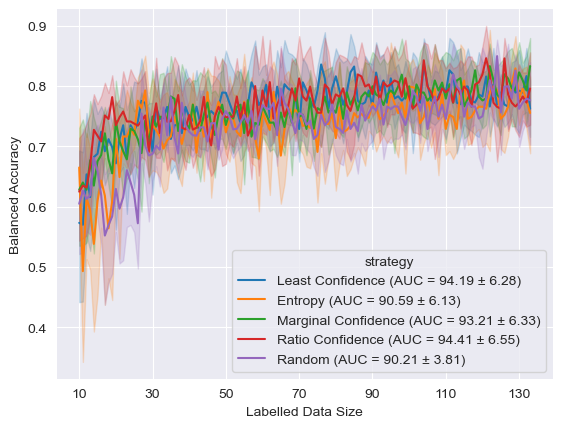

In [5]:
sns.set_style("darkgrid")

sns.lineplot(data=res, x="iteration", y="test_metric", hue="strategy")
plt.ylabel("Balanced Accuracy")
plt.xlabel("Labelled Data Size")

current_xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([int(label) + 10 for label in current_xticks])

ax = plt.gca()
legend = ax.get_legend()
for text in legend.get_texts():
    label = text.get_text()
    new_label = f"{label.replace('_', ' ').title()} (AUC = {label_to_auc[label]})"
    text.set_text(new_label)
    

for spine in ax.spines.values():
    spine.set_visible(False)